In [51]:
import numpy as np
import ast
import importlib.machinery
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from torch.autograd import Variable
import os
import copy
from torchvision import transforms
from matplotlib import image
from PIL import Image
import sys
from network_upsampling import Snow_loss, Snow_dataset, Snow_model as Snow_model_up
sys.path.append('./pytorch-CycleGAN-and-pix2pix')
from models.networks import define_G

In [52]:
def tensor2im(input_image, imtype=np.uint8):
    """"Converts a Tensor array into a numpy image array.
    Parameters:
        input_image (tensor) --  the input image tensor array
        imtype (type)        --  the desired type of the converted numpy array
    """
    if not isinstance(input_image, np.ndarray):
        if isinstance(input_image, torch.Tensor):  # get the data from a variable
            image_tensor = input_image.data
        else:
            return input_image
        image_numpy = image_tensor[0].cpu().float().numpy()  # convert it into a numpy array
        if image_numpy.shape[0] == 1:  # grayscale to RGB
            image_numpy = np.tile(image_numpy, (3, 1, 1))
        image_numpy = (np.transpose(image_numpy, (1, 2, 0)) + 1) / 2.0 * 255.0  # post-processing: tranpose and scaling
    else:  # if it is a numpy array, do nothing
        image_numpy = input_image
    return image_numpy.astype(imtype)

import math

def calculate_psnr(img1, img2):
    # img1 and img2 have range [0, 255]
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    mse = np.mean((img1 - img2)**2)
    if mse == 0:
        return float('inf')
    return 20 * math.log10(255.0 / math.sqrt(mse))

In [64]:
model = Snow_model_up(initial_size=4).cpu()
# cp = torch.load('./downsampling_desnowNet/best_checkpoint_-0.3642.pt')
cp = torch.load('./downsampling_desnowNet_xavier_256/best_checkpoint_-0.3541.pt')
model.load_state_dict(cp['model_state_dict'])
model.eval()

G = define_G(3, 3, 64, 'resnet_9blocks', norm='instance', aspp=True)

GU = define_G(3, 3, 64, 'unet_256', norm='instance', aspp=True)

cp = torch.load('./pytorch-CycleGAN-and-pix2pix/checkpoints/snow_cyclegan_aspp/latest_net_G_A.pth')
G.load_state_dict(cp)
G.eval()

cp = torch.load('./pytorch-CycleGAN-and-pix2pix/checkpoints/snow_cycle_gan_unet/latest_net_G_A.pth')
GU.load_state_dict(cp)
GU.eval()

n = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

lallalallalll
initialize network with normal
lallalallalll
lallalallalll
lallalallalll
lallalallalll
lallalallalll
lallalallalll
lallalallalll
lallalallalll
initialize network with normal


In [4]:
# z = Image.open(f"./test/Snow100K-S/mask/first_snow_00494.jpg")
# y = Image.open(f"./test/Snow100K-S/gt/first_snow_00494.jpg")
# x = Image.open(f"./test/Snow100K-S/synthetic/first_snow_00494.jpg")


In [65]:
list_v = np.load('./all/validate_data.npy', allow_pickle=True)
# path = "./test/Snow100K-S/gt/"
# list_v = os.listdir(path)
idx = np.random.randint(0, len(list_v), 100)
count = 0
psnr_gu = 0
psnr_g = 0

for d in idx:
    i = list_v[d]
    # z = Image.open(f"./test/Snow100K-S/mask/{i}")
    # y = Image.open(f"./test/Snow100K-S/gt/{i}")
    # x = Image.open(f"./test/Snow100K-S/synthetic/{i}")
    z = Image.open(f"./all/mask/{i}")
    y = Image.open(f"./all/gt/{i}")
    x = Image.open(f"./all/synthetic/{i}")
    z = transforms.Grayscale()(z)
    osize = [256, 256]
    re = transforms.Resize(osize, Image.BICUBIC)
    x = re(x)
    y = re(y)
    z = re(z)
    z = transforms.ToTensor()(z)
    y = transforms.ToTensor()(y)
    x = transforms.ToTensor()(x)
    nx = n(x)
    
    with torch.no_grad():
        y_hat, y_prime, z_hat = model(x.unsqueeze(0), train=False)
        result_GU = GU(nx.unsqueeze(0))
        result_G = G(nx.unsqueeze(0))
        im_dsw = transforms.ToPILImage()(y_hat.squeeze(0))
        z_dsw = transforms.ToPILImage()(z_hat.squeeze(0))
        im_dsw.save(f"./remove_image/{count}_dsw.jpg")
        z_dsw.save(f"./remove_image/{count}_z.jpg")
        im_gu = transforms.ToPILImage()(tensor2im(result_GU))
        im_gu.save(f"./remove_image/{count}_gu.jpg")
        im_g = transforms.ToPILImage()(tensor2im(result_G))
        im_g.save(f"./remove_image/{count}_g.jpg")
        im_x = transforms.ToPILImage()(x.squeeze(0))
        im_x.save(f"./remove_image/{count}_x.jpg")
        im_y = transforms.ToPILImage()(y.squeeze(0))
        im_y.save(f"./remove_image/{count}_y.jpg")
        psnr_gu += calculate_psnr(255 * y.numpy(), tensor2im(result_GU).transpose(2, 0, 1))
        psnr_g += calculate_psnr(255 * y.numpy(), tensor2im(result_G).transpose(2, 0, 1))
    print(count, end=' ')
    count += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

In [48]:
psnr_gu / 1000

27.1408223715307

In [49]:
psnr_g / 1000

24.107227654684408

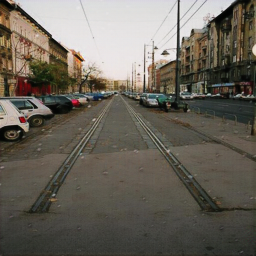

In [66]:
transforms.ToPILImage()(tensor2im(result_GU))
# im_gu.save('gu')

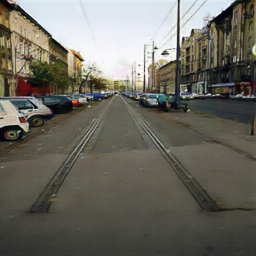

In [67]:
transforms.ToPILImage()(tensor2im(result_G))

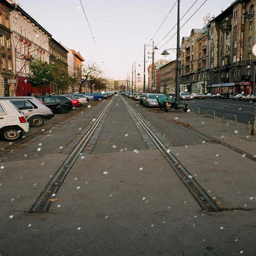

In [68]:
transforms.ToPILImage()(x.squeeze(0))